# Importing useful libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df.shape

(5172, 3002)

In [8]:
df = df.drop(['Email No.'], axis=1)

In [9]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [10]:
df_1 = df.groupby('Prediction')
df_1.first()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
Prediction,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5,1,4,2,3,45,1,0,16,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_1.Prediction.value_counts()

Prediction  Prediction
0           0             3672
1           1             1500
Name: Prediction, dtype: int64

# Figuring out some comparatively more important features

In [12]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english')), print(len(stopwords.words('english')))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora\stopwords.zip.


(None, None)

In [13]:
df = df.drop(['the', 'to', 'and', 'for', 'of', 'a', 'you', 'in', 'on', 'is', 'this', 'i', 'be', 'that', 'will', 'have', 'with', 'your', 'at', 'we', 's', 'are', 'it', 'by', 'as', 'from', 'or', 'not', 'me', 'if', 're', 'any', 'our', 'can', 'd', 'all', 'has', 'was', 'an', 't', 'up', 'should', 'do', 'am', 'out', 'no', 'there', 'but', 'been', 'these', 'so', 'm', 'into', 'they', 'my', 'what', 'only', 'which', 'more', 'about', 'now', 'their', 'some', 'just', 'other', 'here', 'when', 'over', 'them', 'below', 'o', 'he', 'were', 'who', 'don', 'its', 'through', 'had', 'she', 'how', 'being', 'under', 'than', 'off', 'after', 'each', 'll', 'did', 'before', 'then', 'his', 'same', 'does', 'above', 'those', 'down', 'very', 'her', 'such', 'again', 'both', 've', 'until', 'because', 'where', 'further', 'most', 'between', 'own', 'once', 'while', 'during', 'why', 'him', 'few', 'y', 'too', 'having', 'doing', 'didn', 'yourself', 'doesn', 'won', 'against', 'nor', 'myself', 'isn', 'haven', 'whom', 'couldn', 'wasn', 'itself', 'ma', 'aren'], axis=1)
df.head()

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,...,0,0,0,0,0,0,0,1,0,0


In [15]:
features = df.columns

list_2 = []
for i in features:
  if i not in stopwords.words('english'):
    list_2.append(i)
print(list_2)
     

['ect', 'hou', 'enron', 'com', 'gas', 'deal', 'meter', 'hpl', 'please', 'e', 'corp', 'know', 'need', 'forwarded', 'new', 'may', 'j', 'mmbtu', 'get', 'see', 'price', 'daren', 'company', 'l', 'let', 'would', 'xls', 'farmer', 'attached', 'us', 'information', 'message', 'day', 'time', 'one', 'http', 'th', 'volume', 'mail', 'contract', 'month', 'robert', 'sitara', 'texas', 'nom', 'energy', 'pec', 'questions', 'www', 'deals', 'volumes', 'pm', 'ena', 'file', 'email', 'also', 'call', 'change', 'like', 'b', 'flow', 'net', 'following', 'p', 'production', 'back', 'want', 'original', 'ticket', 'c', 'could', 'make', 'inc', 'report', 'march', 'contact', 'days', 'list', 'nomination', 'system', 'april', 'number', 'sale', 'first', 'thanks', 'business', 'help', 'per', 'july', 'forward', 'font', 'free', 'daily', 'use', 'order', 'today', 'r', 'fw', 'set', 'plant', 'statements', 'go', 'gary', 'oil', 'line', 'sales', 'w', 'effective', 'well', 'tenaska', 'take', 'june', 'x', 'within', 'nbsp', 'north', 'ameri

# Train - Test Split

In [16]:
df.head()

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,...,0,0,0,0,0,0,0,1,0,0


In [17]:
df_2 = df.loc[:, df.columns.drop(['Prediction'])]
df_2.head()

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,...,0,0,0,0,0,0,0,0,1,0


In [18]:
df.head()

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,...,0,0,0,0,0,0,0,1,0,0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_2,df.Prediction, test_size=0.25)

# Making Predictions using Multinomial NB Classifier

In [20]:
# Feed the train data into multinomial naive bias classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [21]:
# Check the model's accuracy of test data and plot the ROC-AUC curve
model.score(X_test,y_test)

0.934261407579273

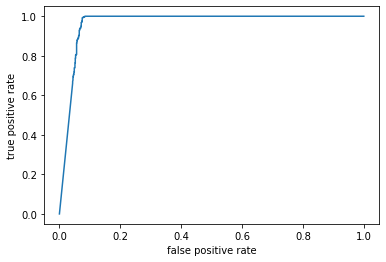

In [22]:
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('true positive rate')
plt.xlabel('false positive rate')
plt.show()

# Plot the confusion Matrix

In [23]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.classes_

array([0, 1], dtype=int64)

In [24]:
 # Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(X_train,y_train)

SVC()

In [25]:
model_2.score(X_test,y_test)


0.8035576179427688

# Comparing the models

Among both the models, NB classifier model has better accuracy around 93% where the model that used SV classifier had accuracy just around 80%. Hence the former model had better performance than the later one. NB treats the features as independent whereas SVM classifiers lookks at the interactions between the features to a certain degree and this coulde be the reason for NB classifier to have better performance than SVC.